# Basic Exercises on Data Importing - Understanding - Manipulating - Analysis - Visualization

## Section-1: The pupose of the below exercises (1-7) is to create dictionary and convert into dataframes, how to diplay etc...
## The below exercises required to create data 

### 1. Import the necessary libraries (pandas, numpy, datetime, re etc)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks")

### 2. Run the below line of code to create a dictionary and this will be used for below exercises

In [2]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }

### 3. Assign it to a object called pokemon and it should be a pandas DataFrame

In [3]:
pokemon = pd.DataFrame(raw_data)

In [4]:
type(pokemon)

pandas.core.frame.DataFrame

In [5]:
pokemon

,name,evolution,type,hp,pokedex
0,Bulbasaur,Ivysaur,grass,45,yes
1,Charmander,Charmeleon,fire,39,no
2,Squirtle,Wartortle,water,44,yes
3,Caterpie,Metapod,bug,45,no


### 4. If the DataFrame columns are in alphabetical order, change the order of the columns as name, type, hp, evolution, pokedex

In [6]:
# method-1
pokemon = pokemon[['name', 'type', 'hp', 'evolution', 'pokedex']]

In [7]:
pokemon

,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no
2,Squirtle,water,44,Wartortle,yes
3,Caterpie,bug,45,Metapod,no


In [8]:
# method-2
pokemon.iloc[:,[0,2,3,1,4]]

,name,hp,evolution,type,pokedex
0,Bulbasaur,45,Ivysaur,grass,yes
1,Charmander,39,Charmeleon,fire,no
2,Squirtle,44,Wartortle,water,yes
3,Caterpie,45,Metapod,bug,no


### 5. Add another column called place, and insert places (lakes, parks, hills, forest etc) of your choice.

In [9]:
# Using assign method

pokemon = pokemon.assign(place = ['lakes','parks', 'hills', 'forest'])

In [10]:
# Using bracket method

pokemon['place'] = pd.Series(['lakes','parks', 'hills', 'forest'])

In [11]:
pokemon

,name,type,hp,evolution,pokedex,place
0,Bulbasaur,grass,45,Ivysaur,yes,lakes
1,Charmander,fire,39,Charmeleon,no,parks
2,Squirtle,water,44,Wartortle,yes,hills
3,Caterpie,bug,45,Metapod,no,forest


In [12]:
# Using loc method

pokemon.loc[:,'place'] = pd.Series(['lakes','parks', 'hills', 'forest'])

In [13]:
pokemon

,name,type,hp,evolution,pokedex,place
0,Bulbasaur,grass,45,Ivysaur,yes,lakes
1,Charmander,fire,39,Charmeleon,no,parks
2,Squirtle,water,44,Wartortle,yes,hills
3,Caterpie,bug,45,Metapod,no,forest


### 6. Display the data type of each column

In [14]:
pokemon.dtypes

name         object
type         object
hp            int64
evolution    object
pokedex      object
place        object
dtype: object

### 7. Display the info of dataframe

In [15]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       4 non-null      object
 1   type       4 non-null      object
 2   hp         4 non-null      int64 
 3   evolution  4 non-null      object
 4   pokedex    4 non-null      object
 5   place      4 non-null      object
dtypes: int64(1), object(5)
memory usage: 324.0+ bytes


## Section-2: The pupose of the below exercise (8-20) is to understand deleting data with pandas.
## The below exercises required to use wine.data

### 8. Import the dataset *wine.txt* from the folder and assign it to a object called wine

Please note that the original data text file doesn't contain any header. Please ensure that when you import the data, you should use a suitable argument so as to avoid data getting imported as header.

In [16]:
# pd.read_csv - here no need to specify delimiter, it will take care by itself

file_path = 'C://Projects//Manipulation_data//Exercise Data Files//wine.txt'
pd.read_csv(file_path, header= None)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [17]:
# pd.read_table - it is for any dilimited file

file_path = 'C://Projects//Manipulation_data//Exercise Data Files//wine.txt'

wine = pd.read_table(file_path , delimiter = ',', header = None )

In [18]:
wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### 9. Delete the first, fourth, seventh, nineth, eleventh, thirteenth and fourteenth columns

In [19]:
# use this instead of inplace, someimes you get an error

wine = wine.drop(columns=[0,3,6,8,10,12,13],axis=1)

In [20]:
# another way

# wine.drop(columns=[0,3,6,8,10,12,13], inplace = True)

In [21]:
wine

,1,2,4,5,7,9,11
0,14.23,1.71,15.6,127,3.06,2.29,1.04
1,13.20,1.78,11.2,100,2.76,1.28,1.05
2,13.16,2.36,18.6,101,3.24,2.81,1.03
3,14.37,1.95,16.8,113,3.49,2.18,0.86
4,13.24,2.59,21.0,118,2.69,1.82,1.04
...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,95,0.61,1.06,0.64
174,13.40,3.91,23.0,102,0.75,1.41,0.70
175,13.27,4.28,20.0,120,0.69,1.35,0.59
176,13.17,2.59,20.0,120,0.68,1.46,0.60


### 10. Assign the columns as below:

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it):  
1) alcohol  
2) malic_acid  
3) alcalinity_of_ash  
4) magnesium  
5) flavanoids  
6) proanthocyanins  
7) hue 

In [22]:
wine.columns

Int64Index([1, 2, 4, 5, 7, 9, 11], dtype='int64')

In [23]:
wine.columns = ['alcohol','malic_acid','alcalinity_of_ash','magnesium','flavanoids','proanthocyanins','hue']

In [24]:
wine.head(2)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,14.23,1.71,15.6,127,3.06,2.29,1.04
1,13.20,1.78,11.2,100,2.76,1.28,1.05


In [25]:
# this we can also use but here we have to give old column name and new col name also, kind of lengthy

col_dir = { 1:'alcohol', 2:'malic_acid', 4:'alcalinity_of_ash', 5:'magnesium', 7:'flavanoids', 9:'proanthocyanins', 11:'hue'}
wine.rename(columns= col_dir , inplace= True)

In [26]:
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,14.23,1.71,15.6,127,3.06,2.29,1.04
1,13.20,1.78,11.2,100,2.76,1.28,1.05
2,13.16,2.36,18.6,101,3.24,2.81,1.03
3,14.37,1.95,16.8,113,3.49,2.18,0.86
4,13.24,2.59,21.0,118,2.69,1.82,1.04


### 11. Set the values of the first 3 values from alcohol column as NaN

In [27]:
# wine.alcohol[0:3] = np.nan  # method-1

#wine.loc[ 0:2 ,['alcohol']] = np.nan # method-2

wine.iloc[0:3, [0]] = np.nan   # method-3

In [28]:
wine.loc[0:2,['alcohol']] = np.nan

In [29]:
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.71,15.6,127,3.06,2.29,1.04
1,NaN,1.78,11.2,100,2.76,1.28,1.05
2,NaN,2.36,18.6,101,3.24,2.81,1.03
3,14.37,1.95,16.8,113,3.49,2.18,0.86
4,13.24,2.59,21.0,118,2.69,1.82,1.04


### 12. Now set the value of the rows 3 and 4 of magnesium as NaN

In [30]:
# wine.loc[ 2:3 , ['magnesium']] = np.nan # method-1

wine.iloc[2:4,[3]] = np.nan

In [31]:
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.71,15.6,127.0,3.06,2.29,1.04
1,NaN,1.78,11.2,100.0,2.76,1.28,1.05
2,NaN,2.36,18.6,NaN,3.24,2.81,1.03
3,14.37,1.95,16.8,NaN,3.49,2.18,0.86
4,13.24,2.59,21.0,118.0,2.69,1.82,1.04


### 13. Fill the value of NaN with the number 10 in alcohol and 100 in magnesium

In [32]:
# All the 3 codes are working
#1
# wine['alcohol'].fillna(10, inplace = True)
# wine['magnesium'].fillna(100, inplace = True)

wine['alcohol']=wine['alcohol'].fillna(10)
wine['magnesium']=wine['magnesium'].fillna(100)  # missing imputation(by sir)

In [33]:
#2
values = {'alcohol':10 ,'magnesium' : 100}
wine = wine.fillna(value = values)

In [34]:
#3
wine[['alcohol','magnesium']] = wine[['alcohol','magnesium']].fillna({"alcohol":10 , "magnesium" : 100})

In [35]:
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,1.71,15.6,127.0,3.06,2.29,1.04
1,10.00,1.78,11.2,100.0,2.76,1.28,1.05
2,10.00,2.36,18.6,100.0,3.24,2.81,1.03
3,14.37,1.95,16.8,100.0,3.49,2.18,0.86
4,13.24,2.59,21.0,118.0,2.69,1.82,1.04


### 14. Count the number of missing values in all columns.

In [36]:
wine.isnull().sum()

alcohol              0
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

In [37]:
wine.isna().sum()

alcohol              0
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

In [38]:
# Here x is used for every columns in DF, where apply is looping over that col
# another method
def miss_cnt(x):
    nmiss = x.isnull().sum()
    return nmiss

wine.apply(miss_cnt)

alcohol              0
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

### 15.  Create an array of 10 random numbers up until 10 and save it.

In [39]:
# np.random.randint 
#(low = 0,high = 11,size = 10)

In [40]:
np.random.randint(10)  # it will always generate only 1 value uner 10

4

In [41]:
rand_arr = np.random.randint( low=0, high=11, size = 10)

In [42]:
rand_arr

array([ 3,  9,  1, 10,  5, 10, 10,  4,  4,  0])

### 16.  Set the rows corresponding to the random numbers to NaN in the column *alcohol*

In [43]:
#1
wine.alcohol.loc[rand_arr] = np.nan

In [44]:
#2 by sir
wine.alcohol.iloc[rand_arr] = np.nan

In [45]:
wine.head(11)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.71,15.6,127.0,3.06,2.29,1.04
1,NaN,1.78,11.2,100.0,2.76,1.28,1.05
2,10.00,2.36,18.6,100.0,3.24,2.81,1.03
3,NaN,1.95,16.8,100.0,3.49,2.18,0.86
4,NaN,2.59,21.0,118.0,2.69,1.82,1.04
5,NaN,1.76,15.2,112.0,3.39,1.97,1.05
6,14.39,1.87,14.6,96.0,2.52,1.98,1.02
7,14.06,2.15,17.6,121.0,2.51,1.25,1.06
8,14.83,1.64,14.0,97.0,2.98,1.98,1.08
9,NaN,1.35,16.0,98.0,3.15,1.85,1.01


### 17.  How many missing values do we have now?

In [46]:
#1
wine.isnull().sum()

alcohol              7
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

In [47]:
#2
wine.isna().sum()

alcohol              7
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

### 18. Print only the non-null values in alcohol

In [48]:
wine.alcohol[wine.alcohol.isna()]   # missing observation of alcohol column

0    NaN
1    NaN
3    NaN
4    NaN
5    NaN
9    NaN
10   NaN
Name: alcohol, dtype: float64

In [49]:
wine.alcohol[~wine.alcohol.isna()]   #non missing observations of alcohol column

2      10.00
6      14.39
7      14.06
8      14.83
11     14.12
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 171, dtype: float64

### 19. Delete the rows that contain missing values

In [50]:
wine_new = wine.dropna()

In [51]:
wine_new  # missing value rows got deleted

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
2,10.00,2.36,18.6,100.0,3.24,2.81,1.03
6,14.39,1.87,14.6,96.0,2.52,1.98,1.02
7,14.06,2.15,17.6,121.0,2.51,1.25,1.06
8,14.83,1.64,14.0,97.0,2.98,1.98,1.08
11,14.12,1.48,16.8,95.0,2.43,1.57,1.17
...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,95.0,0.61,1.06,0.64
174,13.40,3.91,23.0,102.0,0.75,1.41,0.70
175,13.27,4.28,20.0,120.0,0.69,1.35,0.59
176,13.17,2.59,20.0,120.0,0.68,1.46,0.60


### 20.  Reset the index, so it starts with 0 again

In [52]:
wine_new.reset_index(drop = True, inplace= True)

In [53]:
wine_new

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,2.36,18.6,100.0,3.24,2.81,1.03
1,14.39,1.87,14.6,96.0,2.52,1.98,1.02
2,14.06,2.15,17.6,121.0,2.51,1.25,1.06
3,14.83,1.64,14.0,97.0,2.98,1.98,1.08
4,14.12,1.48,16.8,95.0,2.43,1.57,1.17
...,...,...,...,...,...,...,...
166,13.71,5.65,20.5,95.0,0.61,1.06,0.64
167,13.40,3.91,23.0,102.0,0.75,1.41,0.70
168,13.27,4.28,20.0,120.0,0.69,1.35,0.59
169,13.17,2.59,20.0,120.0,0.68,1.46,0.60


## Section-3: The pupose of the below exercise (21-27) is to understand ***filtering & sorting*** data from dataframe.
## The below exercises required to use chipotle.tsv

This time we are going to pull data directly from the internet.  
Import the dataset directly from this link (https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv) and create dataframe called chipo

In [54]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', delimiter = '\t' )

In [55]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### 21. How many products cost more than $10.00? 

Use `str` attribute to remove the $ sign and convert the column to proper numeric type data before filtering.


In [56]:
chipo['item_price'] = chipo.item_price.apply(lambda x: str(x).replace('$','')).astype('float')

In [57]:
len(chipo.item_price[chipo.item_price>10]) # method 1

1130

In [58]:
chipo.item_price[chipo.item_price>10].count()  # method 2

1130

### 22. Print the Chipo Dataframe & info about data frame

In [59]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [60]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


### 23. What is the price of each item? 
- Delete the duplicates in item_name and quantity
- Print a data frame with only two columns `item_name` and `item_price`
- Sort the values from the most to less expensive

In [61]:
chipo.duplicated().value_counts()

False    4563
True       59
dtype: int64

In [62]:
# identifying the duplicates
chipo.duplicated().sum()

59

In [63]:
chipo.drop_duplicates(subset = ['item_name','quantity'])[['item_name','item_price']].\
sort_values(by = 'item_price', ascending = False)

,item_name,item_price
3598,Chips and Fresh Tomato Salsa,44.25
3480,Carnitas Bowl,35.25
1254,Chicken Burrito,35.00
3601,Veggie Burrito,33.75
409,Chicken Bowl,32.94
...,...,...
40,Chips,2.15
6,Side of Chips,1.69
263,Canned Soft Drink,1.25
34,Bottled Water,1.09


In [64]:
# not deleted in original df coz we have not used inplace = true or reassigned it
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [65]:
# .drop duplicates - entire record will get deleted we can also use that
# chipo[~chipo.duplicated(subset = ['item_name','quantity'])][['item_name','item_price']]
#                                           .sort_values(by = 'item_price', ascending = False)

chipo[~chipo[['item_name','quantity']].duplicated()][['item_name','item_price']].\
sort_values(by = 'item_price', ascending = False)

,item_name,item_price
3598,Chips and Fresh Tomato Salsa,44.25
3480,Carnitas Bowl,35.25
1254,Chicken Burrito,35.00
3601,Veggie Burrito,33.75
409,Chicken Bowl,32.94
...,...,...
40,Chips,2.15
6,Side of Chips,1.69
263,Canned Soft Drink,1.25
34,Bottled Water,1.09


### 24. Sort by the name of the item

In [66]:
chipo = chipo.sort_values(by = 'item_name')   # method-1

#chipo.sort_values(by = 'item_name', inplace = True) # method-2

In [67]:
chipo

,order_id,quantity,item_name,choice_description,item_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49
...,...,...,...,...,...
2384,948,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
781,322,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Black Beans, Cheese, Sou...",8.75
2851,1132,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",8.49
1699,688,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25


### 25. What was the quantity of the most expensive item ordered?

In [68]:
chipo.item_price.max()

44.25

In [69]:
chipo[chipo.item_price == chipo.item_price.max()][['item_name','item_price','quantity']] # method-1

,item_name,item_price,quantity
3598,Chips and Fresh Tomato Salsa,44.25,15


In [70]:
chipo.sort_values(by = 'item_price', ascending= False).head(1)   # method-2

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25


### 26. How many times were a Veggie Salad Bowl ordered?

In [71]:
len(chipo.item_name[chipo.item_name == 'Veggie Salad Bowl']) #method-1

18

In [72]:
chipo.item_name[chipo.item_name == 'Veggie Salad Bowl'].count() # method-2

18

In [73]:
chipo.item_name.value_counts()[['Veggie Salad Bowl']]   # method-3

Veggie Salad Bowl    18
Name: item_name, dtype: int64

### 27. How many times people orderd more than one Canned Soda?

In [74]:
chipo.item_name[(chipo.item_name == 'Canned Soda') & (chipo.quantity>1)].count()

20

## Section-4: The purpose of the below exercises is to understand how to perform aggregations of data frame
## The below exercises (28-33) required to use occupation.csv

###  28. Import the dataset occupation.csv and assign object as users

In [75]:
file_path = 'C://Projects//Manipulation_data//Exercise Data Files//occupation.csv'

users = pd.read_csv(file_path, delimiter='|')

In [76]:
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


### 29. Discover what is the mean age per occupation

In [77]:
# users.groupby(by= ['occupation'])[['age']].agg({'age':np.mean})

In [78]:
# users.groupby(by= ['occupation'])[['age']].mean()

In [79]:
# using pivot table (on top of it, we can use .round(5) to round upto 5 decimal places)
# users.pivot_table(index='occupation', values='age', aggfunc=np.mean)

In [80]:
 users.groupby(by = 'occupation')[['age']].agg(mean_age_per_occupation = ('age', np.mean))

,mean_age_per_occupation
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


### 30. Discover the Male ratio per occupation and sort it from the most to the least.

Use numpy.where() to encode gender column.

In [81]:
# Male = 1, Female = 0
users['gender'] = np.where(users.gender =='M',1,0)

In [82]:
users.groupby(by= ['occupation'])[['gender']].agg(np.mean).sort_values(by = 'gender', ascending= False).head()

,gender
occupation,
doctor,1.000000
engineer,0.970149
technician,0.962963
retired,0.928571
programmer,0.909091


In [83]:
male_ratio_per_occup = users.pivot_table(index = 'occupation', values= 'gender', aggfunc= np.mean)

In [84]:
# Renaming the column
male_ratio_per_occup.columns = ['male_percent']

In [85]:
# adding the col
male_ratio_per_occup['female_percent'] = 1-male_ratio_per_occup.male_percent

In [86]:
# sorting the col
male_ratio_per_occup.sort_values(by = 'male_percent', ascending = False)

,male_percent,female_percent
occupation,,
doctor,1.000000,0.000000
engineer,0.970149,0.029851
technician,0.962963,0.037037
retired,0.928571,0.071429
programmer,0.909091,0.090909
executive,0.906250,0.093750
scientist,0.903226,0.096774
entertainment,0.888889,0.111111
lawyer,0.833333,0.166667


### 31. For each occupation, calculate the minimum and maximum ages

In [87]:
users.groupby(by = 'occupation')[['age']].agg(min_age = ('age',np.min), max_age =('age',np.max))

,min_age,max_age
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


### 32. For each combination of occupation and gender, calculate the mean age

In [88]:
# Male = 1, Female = 0
users.pivot_table(index= ['occupation'], columns='gender',values = 'age', aggfunc=np.mean).head()

gender,0,1
occupation,,
administrator,40.638889,37.162791
artist,30.307692,32.333333
doctor,NaN,43.571429
educator,39.115385,43.101449
engineer,29.500000,36.600000


In [89]:
users.groupby(by= ['occupation', 'gender'])[['age']].agg(mean_age = ('age', np.mean)).head()

mean_age
occupation    gender           
administrator 0       40.638889
              1       37.162791
artist        0       30.307692
              1       32.333333
doctor        1       43.571429

### 33.  For each occupation present the percentage of women and men

In [90]:
male_ratio_per_occ = users.pivot_table(index='occupation', values= 'gender', aggfunc= np.mean)

In [91]:
# Renaming the column
male_ratio_per_occ.columns = ['Male_perc']

In [92]:
# adding the col
male_ratio_per_occ['Female_perc'] = 1-male_ratio_per_occ.Male_perc

In [93]:
# sorting the col
male_ratio_per_occ.sort_values(by = 'Male_perc', ascending= False)

,Male_perc,Female_perc
occupation,,
doctor,1.000000,0.000000
engineer,0.970149,0.029851
technician,0.962963,0.037037
retired,0.928571,0.071429
programmer,0.909091,0.090909
executive,0.906250,0.093750
scientist,0.903226,0.096774
entertainment,0.888889,0.111111
lawyer,0.833333,0.166667


## Section-6: The purpose of the below exercises is to understand how to use lambda-apply-functions
## The below exercises (34-41) required to use student-mat.csv and student-por.csv files 

### 34. Import the datasets *student-mat* and *student-por* and append them and assigned object as df

In [94]:
file_path = 'C://Projects//Manipulation_data//Exercise Data Files//'
student_mat = pd.read_csv(file_path + 'student-mat.csv')
student_por = pd.read_csv(file_path + 'student-por.csv')

In [95]:
# pd.concat([student_mat,student_por], axis =0)
df = pd.concat([student_mat,student_por])       # method-1

In [96]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [97]:
student_mat.append(student_por).head()  # method-2

C:\Users\91896\AppData\Local\Temp\ipykernel_4056\1995938962.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  student_mat.append(student_por).head()  # method-2


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### 35. For the purpose of this exercise slice the dataframe from 'school' until the 'guardian' column

In [98]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [99]:
df1 = df[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian']]

In [100]:
df1.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father


In [101]:
# df.loc[r,c]
df.loc[:,'school':'guardian'].head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father


In [102]:
df.iloc[:,0:12].head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father


### 36. Create a lambda function that captalize strings (example: if we give at_home as input function and should give At_home as output.

In [103]:
# 3 line of code not required

str1 = 'at_home'
cap_str = lambda x: x.capitalize()
print(cap_str(str1))

At_home


In [104]:
cap_str = lambda x: x.capitalize()
cap_str('at_home')

'At_home'

### 37. Capitalize both Mjob and Fjob variables using above lamdba function

In [105]:
# df['Mjob'] = df.Mjob.apply(cap_str)  # method-1

df['Mjob'] = df.Mjob.apply(lambda x : x.capitalize())
df['Fjob'] = df.Fjob.apply(lambda x : x.capitalize())

In [106]:
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,At_home,Other,...,5,3,3,1,1,3,4,5,5,6


### 38. Print the last elements of the data set. (Last few records)

In [107]:
df.tail(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
647,MS,M,17,U,LE3,T,3,1,Services,Services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,Services,Other,...,4,4,1,3,4,5,4,10,11,11


### 39. Did you notice the original dataframe is still lowercase? Why is that? Fix it and captalize Mjob and Fjob.

In [108]:
student_mat['Mjob'] = student_mat.Mjob.apply(lambda x: str(x).capitalize())
student_mat['Fjob'] = student_mat.Fjob.apply(lambda x: str(x).capitalize())

In [109]:
student_mat.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,At_home,Other,...,5,3,3,1,1,3,4,5,5,6


In [110]:
student_por['Mjob'] = student_mat.Mjob.apply(lambda x: x.capitalize())
student_por['Fjob'] = student_mat.Fjob.apply(lambda x: x.capitalize())

In [111]:
student_por.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,At_home,Other,...,5,3,3,1,1,3,2,9,11,11


In [112]:
# using apply map method for each value level, but series does not supports applymap, df does support
# apply method is used at series level, also df level - we can calculate mean, median or any operation that requires series level
# calculation and returns single value as an output

student_por['Mjob'] = student_mat[['Mjob']].applymap(lambda x: x.lower())

In [113]:
student_por.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,Teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,Other,...,5,3,3,1,1,3,2,9,11,11


In [114]:
student_por['Mjob'] = student_mat[['Mjob']].applymap(lambda x: x.capitalize())

In [115]:
student_por.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,At_home,Other,...,5,3,3,1,1,3,2,9,11,11


### 40. Create a function called majority (to apply on age variable by taking cutoff is 18) that return a boolean value to a new column called legal_drinker

In [116]:
def majority(x):
    if x>18:
        return True
    else:
        return False

In [117]:
# df['legal_drinker'] = df.age.apply(majority)
df['legal_drinker'] = df['age'].apply(majority)

In [118]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,legal_drinker
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,...,3,4,1,1,3,6,5,6,6,False
1,GP,F,17,U,GT3,T,1,1,At_home,Other,...,3,3,1,1,3,4,5,5,6,False
2,GP,F,15,U,LE3,T,1,1,At_home,Other,...,3,2,2,3,3,10,7,8,10,False
3,GP,F,15,U,GT3,T,4,2,Health,Services,...,2,2,1,1,5,2,15,14,15,False
4,GP,F,16,U,GT3,T,3,3,Other,Other,...,3,2,1,2,5,4,6,10,10,False


### 41. Multiply every number of the dataset by 10. 

In [119]:
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,legal_drinker
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,...,3,4,1,1,3,6,5,6,6,False
1,GP,F,17,U,GT3,T,1,1,At_home,Other,...,3,3,1,1,3,4,5,5,6,False


In [120]:
df._get_numeric_data().drop(columns = ['legal_drinker'], axis =1)*100

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1800,400,400,200,200,0,400,300,400,100,100,300,600,500,600,600
1,1700,100,100,100,200,0,500,300,300,100,100,300,400,500,500,600
2,1500,100,100,100,200,300,400,300,200,200,300,300,1000,700,800,1000
3,1500,400,200,100,300,0,300,200,200,100,100,500,200,1500,1400,1500
4,1600,300,300,100,200,0,400,300,200,100,200,500,400,600,1000,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1900,200,300,100,300,100,500,400,200,100,200,500,400,1000,1100,1000
645,1800,300,100,100,200,0,400,300,400,100,100,100,400,1500,1500,1600
646,1800,100,100,200,200,0,100,100,100,100,100,500,600,1100,1200,900
647,1700,300,100,200,100,0,200,400,500,300,400,200,600,1000,1000,1000


In [121]:
numerical_df = df.select_dtypes(include = 'int')

In [122]:
numerical_df.head(2)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6


In [123]:
(numerical_df*10).head(2)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,180,40,40,20,20,0,40,30,40,10,10,30,60,50,60,60
1,170,10,10,10,20,0,50,30,30,10,10,30,40,50,50,60


In [124]:
numerical_df.apply(lambda x:x*10).head(2)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,180,40,40,20,20,0,40,30,40,10,10,30,60,50,60,60
1,170,10,10,10,20,0,50,30,30,10,10,30,40,50,50,60



## Section-6: The purpose of the below exercises is to understand how to perform simple joins
## The below exercises (42-48) required to use cars1.csv and cars2.csv files 

### 42. Import the datasets cars1.csv and cars2.csv and assign names as cars1 and cars2

In [125]:
file_path = 'C://Projects//Manipulation_data//Exercise Data Files//cars1.csv'
cars1 = pd.read_csv(file_path)
cars1.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN,NaN
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,NaN,NaN,NaN,NaN,NaN


In [126]:
file_path = 'C://Projects//Manipulation_data//Exercise Data Files//cars2.csv'
cars2 = pd.read_csv(file_path)
cars2.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,33.0,4,91,53,1795,17.4,76,3,honda civic
1,20.0,6,225,100,3651,17.7,76,1,dodge aspen se


   ### 43. Print the information to cars1 by applying below functions 
   hint: Use different functions/methods like type(), head(), tail(), columns(), info(), dtypes(), index(), shape(), count(), size(), ndim(), axes(), describe(), memory_usage(), sort_values(), value_counts()
   Also create profile report using pandas_profiling.Profile_Report

In [127]:
# to find type of object
type(cars1)

pandas.core.frame.DataFrame

In [128]:
# to see first 5 entries of car1
cars1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN,NaN
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,NaN,NaN,NaN,NaN,NaN
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,NaN,NaN,NaN,NaN,NaN
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,NaN,NaN,NaN,NaN,NaN
4,17.0,8,302,140,3449,10.5,70,1,ford torino,NaN,NaN,NaN,NaN,NaN


In [129]:
# to see last 5 entries of car1
cars1.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
193,24.0,6,200,81,3012,17.6,76,1,ford maverick,NaN,NaN,NaN,NaN,NaN
194,22.5,6,232,90,3085,17.6,76,1,amc hornet,NaN,NaN,NaN,NaN,NaN
195,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette,NaN,NaN,NaN,NaN,NaN
196,24.5,4,98,60,2164,22.1,76,1,chevrolet woody,NaN,NaN,NaN,NaN,NaN
197,29.0,4,90,70,1937,14.2,76,2,vw rabbit,NaN,NaN,NaN,NaN,NaN


In [130]:
cars1.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [131]:
cars1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           198 non-null    float64
 1   cylinders     198 non-null    int64  
 2   displacement  198 non-null    int64  
 3   horsepower    198 non-null    object 
 4   weight        198 non-null    int64  
 5   acceleration  198 non-null    float64
 6   model         198 non-null    int64  
 7   origin        198 non-null    int64  
 8   car           198 non-null    object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
dtypes: float64(7), int64(5), object(2)
memory usage: 21.8+ KB


In [132]:

cars1.dtypes

mpg             float64
cylinders         int64
displacement      int64
horsepower       object
weight            int64
acceleration    float64
model             int64
origin            int64
car              object
Unnamed: 9      float64
Unnamed: 10     float64
Unnamed: 11     float64
Unnamed: 12     float64
Unnamed: 13     float64
dtype: object

In [133]:
cars1.index

RangeIndex(start=0, stop=198, step=1)

In [134]:
cars1.shape

(198, 14)

In [135]:
cars1.count()

mpg             198
cylinders       198
displacement    198
horsepower      198
weight          198
acceleration    198
model           198
origin          198
car             198
Unnamed: 9        0
Unnamed: 10       0
Unnamed: 11       0
Unnamed: 12       0
Unnamed: 13       0
dtype: int64

In [136]:
cars1.size

2772

In [137]:
cars1.ndim

2

In [138]:
cars1.axes

[RangeIndex(start=0, stop=198, step=1),
 Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
        'acceleration', 'model', 'origin', 'car', 'Unnamed: 9', 'Unnamed: 10',
        'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
       dtype='object')]

In [139]:
cars1.describe()

,mpg,cylinders,displacement,weight,acceleration,model,origin,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,0.0,0.0,0.0,0.0,0.0
mean,19.719697,5.898990,223.469697,3177.888889,15.005556,72.818182,1.439394,NaN,NaN,NaN,NaN,NaN
std,5.814254,1.785417,115.181017,934.783733,2.872382,1.865332,0.708085,NaN,NaN,NaN,NaN,NaN
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,15.000000,4.000000,113.250000,2302.500000,13.000000,71.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,19.000000,6.000000,228.000000,3030.000000,15.000000,73.000000,1.000000,NaN,NaN,NaN,NaN,NaN
75%,24.375000,8.000000,318.000000,4080.750000,16.800000,74.000000,2.000000,NaN,NaN,NaN,NaN,NaN
max,35.000000,8.000000,455.000000,5140.000000,23.500000,76.000000,3.000000,NaN,NaN,NaN,NaN,NaN


In [140]:
cars1.memory_usage()

Index            132
mpg             1584
cylinders       1584
displacement    1584
horsepower      1584
weight          1584
acceleration    1584
model           1584
origin          1584
car             1584
Unnamed: 9      1584
Unnamed: 10     1584
Unnamed: 11     1584
Unnamed: 12     1584
Unnamed: 13     1584
dtype: int64

In [141]:
cars1.sort_values(by = 'car').head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
96,13.0,8,360,175,3821,11.0,73,1,amc ambassador brougham,NaN,NaN,NaN,NaN,NaN
9,15.0,8,390,190,3850,8.5,70,1,amc ambassador dpl,NaN,NaN,NaN,NaN,NaN
66,17.0,8,304,150,3672,11.5,72,1,amc ambassador sst,NaN,NaN,NaN,NaN,NaN
107,18.0,6,232,100,2789,15.0,73,1,amc gremlin,NaN,NaN,NaN,NaN,NaN
33,19.0,6,232,100,2634,13.0,71,1,amc gremlin,NaN,NaN,NaN,NaN,NaN


In [142]:
cars1.car.value_counts()

ford pinto               5
ford maverick            5
amc matador              5
amc gremlin              4
amc hornet               4
                        ..
toyota corona hardtop    1
plymouth cricket         1
volkswagen model 111     1
datsun 1200              1
vw rabbit                1
Name: car, Length: 144, dtype: int64

In [334]:
import ydata_profiling

In [335]:
print(dir(ydata_profiling))

['ProfileReport', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'compare', 'compare_reports', 'config', 'controller', 'expectations_report', 'importlib', 'model', 'pandas_decorator', 'profile_report', 'report', 'serialize_report', 'spec', 'utils', 'version', 'visualisation', 'ydata_profiling']


In [337]:
cars1_report = ydata_profiling.ProfileReport(cars1)

In [340]:
cars1_report.to_file('D://Projects//eda//visualisation//cars1_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 44. It seems our first dataset has some unnamed blank columns, fix cars1

In [144]:
cars1 = cars1[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car']]

In [145]:
cars1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
193,24.0,6,200,81,3012,17.6,76,1,ford maverick
194,22.5,6,232,90,3085,17.6,76,1,amc hornet
195,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette
196,24.5,4,98,60,2164,22.1,76,1,chevrolet woody


### 45. What is the number of observations in each dataset?

In [146]:
# len(cars1)
cars1.shape[0]

198

In [147]:
cars2.shape[0]

200

### 46. Join cars1 and cars2 into a single DataFrame called cars

In [148]:
cars1.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car'],
      dtype='object')

In [149]:
cars2.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car'],
      dtype='object')

In [150]:
cars = pd.concat([cars1 , cars2], axis=0)

In [151]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
195,27.0,4,140,86,2790,15.6,82,1,ford mustang gl
196,44.0,4,97,52,2130,24.6,82,2,vw pickup
197,32.0,4,135,84,2295,11.6,82,1,dodge rampage
198,28.0,4,120,79,2625,18.6,82,1,ford ranger


### 47. There is a column missing, called owners. Create a random number Series from 15,000 to 73,000.

In [152]:
# np.random.randint(15000,73001,size=398)  method-1
# np.random.randint(15000,73000,size= cars.shape[0])

In [153]:
np.random.randint(15000,73001,size=len(cars))

array([23093, 62235, 49934, 37694, 62144, 46938, 17939, 57165, 28586,
       19880, 53635, 56499, 68476, 23011, 70058, 36422, 31125, 30789,
       18948, 25665, 66429, 54680, 65505, 56019, 60926, 61140, 61129,
       71071, 43293, 17121, 43297, 33868, 71758, 26912, 19265, 19974,
       29231, 31933, 16410, 54613, 37917, 42654, 60713, 25103, 50038,
       41975, 49151, 16656, 26416, 70316, 30410, 23735, 25386, 33852,
       26298, 17445, 44150, 72670, 70110, 24122, 65153, 25550, 22681,
       56360, 29035, 36711, 38284, 43361, 64186, 63348, 70566, 34571,
       22879, 45500, 64387, 58492, 47555, 52012, 45362, 26293, 24237,
       28540, 46453, 61908, 25646, 47834, 55892, 68698, 31397, 25590,
       72009, 59372, 55881, 21681, 42025, 53858, 37347, 40690, 17273,
       18662, 17092, 69069, 39513, 54930, 59518, 68976, 38030, 70534,
       47277, 49708, 50402, 21158, 58534, 69235, 17197, 21175, 65867,
       68698, 27605, 19006, 38924, 70159, 16220, 63755, 60984, 56801,
       52187, 62597,

### 48. Add the column owners to cars

In [154]:
cars['owners'] = np.random.randint(15000,73001,size=len(cars))

In [155]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,owners
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,55137
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,63500
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,65827
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,32824
4,17.0,8,302,140,3449,10.5,70,1,ford torino,26952
...,...,...,...,...,...,...,...,...,...,...
195,27.0,4,140,86,2790,15.6,82,1,ford mustang gl,71521
196,44.0,4,97,52,2130,24.6,82,2,vw pickup,17477
197,32.0,4,135,84,2295,11.6,82,1,dodge rampage,64290
198,28.0,4,120,79,2625,18.6,82,1,ford ranger,65224


## Section-7: The purpose of the below exercises is to understand how to perform date time operations

### 49. Write a Python script to display the
- a. Current date and time
- b. Current year
- c. Month of year
- d. Week number of the year
- e. Weekday of the week
- f. Day of year
- g. Day of the month
- h. Day of week

In [156]:
print(dt.datetime.today())
print(dt.datetime.today().date())
print(dt.datetime.today().time())
print(pd.to_datetime(dt.datetime.today()).date().year)
print(pd.to_datetime(dt.datetime.today()).date().month)
print(pd.to_datetime(dt.datetime.today()).date().day)
print(pd.to_datetime(dt.datetime.today().date()).weekday())
print(pd.to_datetime(dt.datetime.today().date()).weekofyear)
print(pd.to_datetime(dt.datetime.today().date()).day_name())
print(pd.to_datetime(dt.datetime.today().date()).day_of_year)


2023-09-18 16:50:59.063529
2023-09-18
16:50:59.063529
2023
9
18
0
38
Monday
261


In [157]:
# Current date and time
# dt.datetime.now()pd.to_datetime(dt.datetime.today())
today_datetime = pd.to_datetime(dt.datetime.today())
today_datetime

Timestamp('2023-09-18 16:50:59.629689')

In [158]:
type(today_datetime)

pandas._libs.tslibs.timestamps.Timestamp

In [159]:
# Current date
dt.datetime.today().date()

datetime.date(2023, 9, 18)

In [160]:
# Current time
dt.datetime.today().time()

datetime.time(16, 51, 1, 421183)

In [161]:
# Current year
today_datetime.date().year

2023

In [162]:
# Month of year
today_datetime.date().month

9

In [163]:
# Week number of the year
# today_datetime.week -- same output(week no. of year)
today_datetime.weekofyear

38

In [164]:
# Weekday of the week
today_datetime.weekday()

0

In [165]:
# Day of year
# today_datetime.day_of_year
today_datetime.dayofyear

261

In [166]:
# Day of the month
today_datetime.day

18

In [167]:
# Day of week
today_datetime.day_name()

'Monday'

In [168]:
def todays_info():
    print('Todays Date & Time',pd.to_datetime(dt.datetime.today()))
    print('Todays Date',pd.to_datetime(dt.datetime.today().date()))
    print('Todays Year',pd.to_datetime(dt.datetime.today()).date().year)
    print('Todays Month',pd.to_datetime(dt.datetime.today()).date().month)
    print('Todays Week of Year',pd.to_datetime(dt.datetime.today().date()).weekofyear)
    print('Todays Weekday',pd.to_datetime(dt.datetime.today().date()).weekday())
    print('Todays Day of year',pd.to_datetime(dt.datetime.today().date()).dayofyear)
    print('Todays Day of Month',pd.to_datetime(dt.datetime.today().date()).day)
    print('Todays Day of Week',pd.to_datetime(dt.datetime.today().date()).day_name())

In [169]:
todays_info()

Todays Date & Time 2023-09-18 16:51:06.840513
Todays Date 2023-09-18 00:00:00
Todays Year 2023
Todays Month 9
Todays Week of Year 38
Todays Weekday 0
Todays Day of year 261
Todays Day of Month 18
Todays Day of Week Monday


### 50. Write a Python program to convert a string to datetime.
Sample String : Jul 1 2014 2:43PM 

Expected Output : 2014-07-01 14:43:00

In [170]:
Sample_String = 'Jul 1 2014 2:43PM'

In [171]:
pd.to_datetime(Sample_String, format='%b %d %Y %I:%M%p')

Timestamp('2014-07-01 14:43:00')

In [172]:
Sample_String

'Jul 1 2014 2:43PM'

In [173]:
# dt.datetime.strptime(Sample_String,'%b %d %Y %H:%M%p').year # extract year, .hour - extract hour
# converted string to datetime datatype
Sample_String = dt.datetime.strptime(Sample_String,'%b %d %Y %I:%M%p')

In [174]:
#type(dt.datetime.strptime(Sample_String,'%b %d %Y %H:%M%p'))  datetime
type(Sample_String)

datetime.datetime

In [175]:
dt.datetime.strftime(Sample_String,'%Y-%m-%d %H:%M:%S%p')

'2014-07-01 14:43:00PM'

### 51. Write a Python program to subtract five days from current date.

Current Date : 2015-06-22

5 days before Current Date : 2015-06-17

In [176]:
# Here python understandable format(YYY-mm-dd), so we dont need to explicitly mention the format,
# if not there then need to specify otherwise python will not understand
pd.to_datetime('2015-06-22')-pd.DateOffset(days=5)

Timestamp('2015-06-17 00:00:00')

In [177]:
# By sir    # dt - datetime

pd.to_datetime('2015-06-22')-dt.timedelta(5)

Timestamp('2015-06-17 00:00:00')

### 52. Write a Python program to convert unix timestamp string to readable date.

Sample Unix timestamp string : 1284105682
    
Expected Output : 2010-09-10 13:31:22

In [178]:
pd.to_datetime?

In [179]:
# To convert this into readable format
pd.to_datetime('1284105682', unit='s')

Timestamp('2010-09-10 08:01:22')

### 53. Convert the below Series to pandas datetime : 

DoB = pd.Series(["07Sep59","01Jan55","15Dec47","11Jul42"])

Make sure that the year is 19XX not 20XX

In [180]:
DoB = pd.Series(["07Sep59","01Jan55","15Dec47","11Jul42"])
pd.to_datetime(DoB)

0   2059-09-07
1   2055-01-01
2   2047-12-15
3   2042-07-11
dtype: datetime64[ns]

In [181]:
DoB.dtypes

dtype('O')

In [182]:
# By sir using for loop
pd.to_datetime(pd.Series([str(val).replace('20','19') for val in pd.to_datetime(DoB)]))

0   1959-09-07
1   1955-01-01
2   1947-12-15
3   1942-07-11
dtype: datetime64[ns]

In [183]:
# Using DateOffset method
DoB = pd.Series(["07Sep59","01Jan55","15Dec47","11Jul42"])
pd.to_datetime(DoB)-pd.DateOffset(years = 100)

0   1959-09-07
1   1955-01-01
2   1947-12-15
3   1942-07-11
dtype: datetime64[ns]

### 54. Write a Python program to get days between two dates. 

In [184]:
def days_between_two_dates(x,y):
    return pd.to_datetime(x)-pd.to_datetime(y)

In [185]:
days_between_two_dates('2012-09-21','2012-05-12')

Timedelta('132 days 00:00:00')

### 55. Convert the below date to datetime and then change its display format using the .dt module

Date = "15Dec1989"

Result : "Friday, 15 Dec 98"

In [186]:
Date = "15Dec1989"
pd.to_datetime(Date, format='%d%b%Y').strftime('%A, %d %b %y')

'Friday, 15 Dec 89'

## The below exercises (56-66) required to use wind.data file 

### About wind.data:

The data have been modified to contain some missing values, identified by NaN.  

1. The data in 'wind.data' has the following format:

### 56. Import the dataset wind.data and assign it to a variable called data and replace the first 3 columns by a proper date time index

In [187]:
file_path = 'C://Projects//Manipulation_data//Exercise Data Files//wind.data'
data = pd.read_csv(file_path)

In [188]:
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [189]:
file_path = 'C://Projects//Manipulation_data//Exercise Data Files//wind.data'  # parsing date when importing - method 1
data = pd.read_csv(file_path, parse_dates= [['Yr','Mo','Dy']] )

In [190]:
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [ ]:
# method -2
data['Mo'] = data['Mo'].astype(str).apply(lambda x: ('0'+ x) if (len(x)==1) else x)    # method -2
data['Dy'] = data['Dy'].astype(str).apply(lambda x: ('0'+ x) if (len(x)==1) else x)
data['Yr'] = data['Yr'].astype(str).apply(lambda x: ('19'+ x) if (str(x)<'70') else x)
data['Dates'] = data[['Yr','Mo','Dy']].astype(str).apply(lambda hyp: '-'.join(hyp), axis=1)
data['Dates'] = data['Dates'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d') if (len(x)==10) else pd.to_datetime(x, format='%y-%m-%d'))

In [192]:
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### 57. Year 2061 is seemingly imporoper. Convert every year which are < 70 to 19XX instead of 20XX.

In [193]:
data['Yr_Mo_Dy'] = np.where(data.Yr_Mo_Dy.dt.year.astype(str).str[2:4].astype(int)<=71, data.Yr_Mo_Dy - pd.DateOffset(years = 100), data.Yr_Mo_Dy)
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [194]:
data.dtypes

Yr_Mo_Dy    datetime64[ns]
RPT                float64
VAL                float64
ROS                float64
KIL                float64
SHA                float64
BIR                float64
DUB                float64
CLA                float64
MUL                float64
CLO                float64
BEL                float64
MAL                float64
dtype: object

### 58. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [195]:
data.set_index('Yr_Mo_Dy', drop = True , inplace = True)   # converting normal data into time series data

# Time Series data: data is indexed by date time variable
# you can perform so many analysis related  to time series = Time series analysis, Time series forcasting


In [197]:
data['1968']
data['1968-01']  # slicing and dicing of time series data
data['1968-01-01':'1970-12-10'] # filter the data b/w '1968-01-01':'1970-12-10'
data['1968':'1970'] # filter the data b/w 1968 and 1970 years
data['1970':]   # filter the data from 1970 to end
data[:'1968']   # filter the data till 1969 year

C:\Users\91896\AppData\Local\Temp\ipykernel_4056\3286539162.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data['1968']
C:\Users\91896\AppData\Local\Temp\ipykernel_4056\3286539162.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data['1968-01']  # slicing and dicing of time series data


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1968-12-27,12.21,3.96,15.71,5.83,6.67,3.42,9.87,5.46,7.21,8.29,12.12,25.00
1968-12-28,16.96,7.75,18.00,7.79,9.17,5.88,10.46,4.25,9.25,9.08,18.58,30.16
1968-12-29,16.62,5.96,16.88,5.00,8.83,5.41,10.83,5.54,10.88,10.00,13.08,26.25


In [198]:
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### 59. Compute how many values are missing for each location over the entire record.  
#### They should be ignored in all calculations below. 

In [199]:
data.isna().sum().sum()   # Total missing values 

31

In [200]:
data.dropna(inplace= True)

### 60. Compute how many non-missing values there are in total.

In [201]:
(data.size)-(data.isna().sum().sum())    # non missing values/ cells   (method - 1)

78552

In [202]:
print((data.isna()==False).sum().sum())     # method - 2
(data.isna()==False).sum()

78552


RPT    6546
VAL    6546
ROS    6546
KIL    6546
SHA    6546
BIR    6546
DUB    6546
CLA    6546
MUL    6546
CLO    6546
BEL    6546
MAL    6546
dtype: int64

### 61. Calculate the mean windspeeds over all the locations and all the times.
#### A single number for the entire dataset.

In [203]:
data.mean().mean()

10.222465245951726

### 62. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days 

#### A different set of numbers for each location.

In [204]:
data.apply([np.mean ,np.min, np.max , np.std]).T   # method -1 

,mean,min,max,std
RPT,12.359979,0.67,35.80,5.618805
VAL,10.640267,0.21,33.37,5.268695
ROS,11.656396,1.50,33.84,5.007805
KIL,6.298587,0.00,28.46,3.600942
SHA,10.448923,0.13,37.54,4.933988
BIR,7.085066,0.00,26.16,3.967735
DUB,9.793006,0.00,30.37,4.978030
CLA,8.486601,0.00,31.08,4.498299
MUL,8.490257,0.00,25.88,4.165947
CLO,8.696705,0.04,28.21,4.500488


In [205]:
loc_stats = data.describe().loc[['min','max','mean','std'],:]         # method -2
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.359979,10.640267,11.656396,6.298587,10.448923,7.085066,9.793006,8.486601,8.490257,8.696705,13.110668,15.603129
std,5.618805,5.268695,5.007805,3.600942,4.933988,3.967735,4.978030,4.498299,4.165947,4.500488,5.829054,6.702178


### 63. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

#### A different set of numbers for each day.

In [206]:
data.apply([np.min, np.max, np.mean, np.std], axis = 1)  # without transposing we can use this also - method-1

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
1961-01-06,4.42,13.21,8.240000,2.998063
1961-01-07,4.96,14.29,10.385000,3.072114
1961-01-08,5.91,16.62,10.487500,3.547237
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [207]:
data.T.apply([np.min, np.max, np.mean, np.std]).T    # method -2

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
1961-01-06,4.42,13.21,8.240000,2.998063
1961-01-07,4.96,14.29,10.385000,3.072114
1961-01-08,5.91,16.62,10.487500,3.547237
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [208]:
data.T.describe().loc[['min','max','mean','std'],:]   # method -3

Yr_Mo_Dy,1961-01-04,1961-01-05,1961-01-06,1961-01-07,1961-01-08,1961-01-09,1961-01-10,1961-01-11,1961-01-12,1961-01-13,...,1978-12-22,1978-12-23,1978-12-24,1978-12-25,1978-12-26,1978-12-27,1978-12-28,1978-12-29,1978-12-30,1978-12-31
min,1.790000,6.170000,4.420000,4.960000,5.910000,4.750000,6.54000,2.790000,9.460000,0.580000,...,2.460000,9.500000,4.790000,0.750000,1.960000,8.080000,5.000000,8.710000,9.130000,9.590000
max,11.750000,13.330000,13.210000,14.290000,16.620000,15.370000,19.50000,20.710000,19.750000,9.920000,...,13.080000,22.210000,31.710000,13.960000,13.830000,40.080000,41.460000,29.580000,28.790000,27.290000
mean,6.619167,10.630000,8.240000,10.385000,10.487500,9.897500,10.47750,9.625000,13.524167,4.277500,...,7.000833,15.613333,10.823333,5.729167,6.523333,16.708333,15.150000,14.890000,15.367500,15.402500
std,3.198126,2.445356,2.998063,3.072114,3.547237,2.905954,3.44261,4.805082,3.375046,2.916349,...,3.237337,3.850840,7.195039,3.583263,4.304510,7.868076,9.687857,5.756836,5.540437,5.702483


### 64. Find the average windspeed in January for each location.  
#### Treat January 1961 and January 1962 both as January.

In [209]:
data[(data.index.month==1)].mean()

RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

### 65. Calculate the mean windspeed for each month in the dataset.  
#### Treat January 1961 and January 1962 as *different* months.
#### (hint: first find a  way to create an identifier unique for each month.)

In [210]:
data['month'] = data.index.month
data['year'] = data.index.year
data.groupby(['year','month']).mean()

RPT        VAL        ROS       KIL        SHA        BIR  \
year month                                                                    
1961 1      14.506154  11.225385  12.960385  6.840000  10.509231   8.174231   
     2      16.401923  15.037308  14.470000  9.242692  13.778077  10.884615   
     3      10.660000  11.097407  10.420000  7.100741  10.265556   8.580000   
     4      10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
     5      10.024643   8.495714  10.539286  5.992500   9.480357   6.633929   
...               ...        ...        ...       ...        ...        ...   
2072 8       9.822581   6.824194   9.757097  4.443871   6.490323   4.565484   
     9       9.247333   7.534000  10.230667  3.791667   5.322333   3.580333   
     10     11.489677   9.816774  11.952903  5.230968   7.185484   5.014516   
     11     12.247333  12.351667  11.569333  5.364000   7.687000   5.761667   
     12     15.641290  15.786774  13.743548  7.825806  11.673871   9.877742   

                  DUB        CLA        MUL        CLO        BEL        MAL  
year month                                                                    
1961 1      10.403077   8.670769   8.323462   9.490385  13.270000  14.341538  
     2      11.868077  11.746154  11.748462  12.626538  18.165000  15.300769  
     3       9.108519   9.329259  10.100000  10.989630  16.066296  15.418889  
     4       6.925333   7.094667   7.342333   7.237000  11.147333  10.278333  
     5       7.645714   8.206786   8.120714   8.534643  11.912143  11.911786  
...               ...        ...        ...        ...        ...        ...  
2072 8       8.524194   5.536452   7.302581   5.746774   9.592258  12.696452  
     9       6.846333   5.241000   5.628000   4.171667   9.379000  10.560000  
     10      9.021290   7.967097   7.726129   6.436774  11.919677  14.347742  
     11     10.761000   8.375000   8.483000   7.318000  13.775667  17.888667  
     12     12.566774  11.049355  10.232581   9.782258  17.575806  19.519355  

[216 rows x 12 columns]

### 66. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [211]:
data.index.weekofyear

C:\Users\91896\AppData\Local\Temp\ipykernel_4056\4218993081.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data.index.weekofyear


Int64Index([ 1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
            ...
            51, 51, 51, 52, 52, 52, 52, 52, 52, 52],
           dtype='int64', name='Yr_Mo_Dy', length=6546)

In [212]:
data['Week_of_year'] = data.index.isocalendar().week

In [213]:
data.groupby(['year','Week_of_year']).agg({np.min, np.max, np.mean, np.std})

RPT                                VAL                \
                        std    min    max       mean       std    min    max   
year Week_of_year                                                              
1961 1             1.421418  10.58  13.50  12.316000  3.282076   6.63  14.29   
     2             3.555392   9.04  19.75  12.468571  3.148945   3.54  12.08   
     3             4.893064   4.92  17.75  12.100000  4.070420   3.42  14.37   
     4             4.619061  13.62  25.04  19.880000  4.242125   9.96  20.79   
     5             5.251408  10.58  24.21  16.827143  5.187395   9.46  24.21   
...                     ...    ...    ...        ...       ...    ...    ...   
2072 49            6.054751  11.08  25.58  16.608571  4.316024  10.08  22.04   
     50            5.080419   9.87  25.96  17.917143  4.388905  14.17  25.17   
     51            8.002768   1.79  26.71  11.494286  6.597062   2.21  23.54   
     52            7.643133   8.04  30.42  16.540000  4.140770   7.83  20.30   
     53            1.335253   6.83   9.29   8.360000  1.532677   0.67   3.63   

                                   ROS         ...    BEL             \
                        mean       std    min  ...    max       mean   
year Week_of_year                              ...                     
1961 1             10.408000  1.656985   7.62  ...  16.62  11.416000   
     2              8.967143  5.034959   7.08  ...  20.71  11.125714   
     3              9.500000  4.101421   7.29  ...  15.92   9.993333   
     4             14.846667  4.719091  12.67  ...  26.08  19.800000   
     5             15.460000  3.975166   9.04  ...  19.33  14.012857   
...                      ...       ...    ...  ...    ...        ...   
2072 49            16.554286  5.540625   7.21  ...  29.08  17.547143   
     50            19.572857  1.813592  14.33  ...  27.21  20.471429   
     51            12.504286  6.572069   3.96  ...  27.46  17.544286   
     52            13.528333  4.416666   9.25  ...  21.04  16.193333   
     53             1.920000  2.645695   9.25  ...   8.71   4.223333   

                        MAL                             month          \
                        std    min    max       mean      std min max   
year Week_of_year                                                       
1961 1             2.134978  10.88  16.46  13.226000  0.00000   1   1   
     2             4.692355   5.17  16.92  11.024286  0.00000   1   1   
     3             3.407132   6.79  16.08  10.346667  0.00000   1   1   
     4             4.224639  17.50  27.63  22.388333  0.00000   1   1   
     5             4.336104   7.17  19.25  11.935714  0.48795   1   2   
...                     ...    ...    ...        ...      ...  ..  ..   
2072 49            7.898160   6.92  29.83  19.607143  0.00000  12  12   
     50            2.951663  19.87  26.25  23.408571  0.00000  12  12   
     51            6.665625   9.59  31.25  18.154286  0.00000  12  12   
     52            3.948154  14.50  25.00  17.250000  0.00000  12  12   
     53            7.176608   5.88  19.17  10.960000  0.00000   1   1   

                              
                        mean  
year Week_of_year             
1961 1              1.000000  
     2              1.000000  
     3              1.000000  
     4              1.000000  
     5              1.714286  
...                      ...  
2072 49            12.000000  
     50            12.000000  
     51            12.000000  
     52            12.000000  
     53             1.000000  

[943 rows x 52 columns]

## The below exercises (67-70) required to use appl_1980_2014.csv  file

### 67. Import the file appl_1980_2014.csv and assign it to a variable called 'apple'

In [214]:
file_path = 'C://Projects//Manipulation_data//Exercise Data Files//appl_1980_2014.csv'
apple = pd.read_csv(file_path)
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### 68.  Check out the type of the columns

In [215]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### 69. Transform the Date column as a datetime type

In [216]:
apple['Date'] = pd.to_datetime(apple.Date, format='%Y-%m-%d')

In [217]:
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### 70.  Set the date as the index

In [218]:
apple.set_index('Date', drop = True, inplace = True)

In [219]:
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### 71.  Is there any duplicate dates?

In [220]:
apple.duplicated().sum()

0

### 72.  The index is from the most recent date. Sort the data so that the first entry is the oldest date.

In [266]:
# apple.sort_index()  by default = True , no need to specify

In [221]:
apple.sort_index(ascending= True)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### 73. Get the last business day of each month

In [222]:
apple['month'] = apple.index.month
apple['year'] = apple.index.year
apple['day'] = apple.index.day

In [223]:
apple

,Open,High,Low,Close,Volume,Adj Close,month,year,day
Date,,,,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,7,2014,8
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,7,2014,7
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,7,2014,3
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,7,2014,2
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,7,2014,1
...,...,...,...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,12,1980,18
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,12,1980,17
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,12,1980,16


In [224]:
apple.groupby(['year','month']).agg({'day':np.max})

day
year month     
1980 12      31
1981 1       30
     2       27
     3       31
     4       30
...         ...
2014 3       31
     4       30
     5       30
     6       30
     7        8

[404 rows x 1 columns]

### 74.  What is the difference in days between the first day and the oldest

In [225]:
apple.index.max() - apple.index.min()

Timedelta('12261 days 00:00:00')

### 75.  How many months in the data we have?

In [226]:
apple.groupby(['year','month']).agg({'day':'max'}).count()

day    404
dtype: int64

## Section-8: The purpose of the below exercises is to understand how to create basic graphs

### 76. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

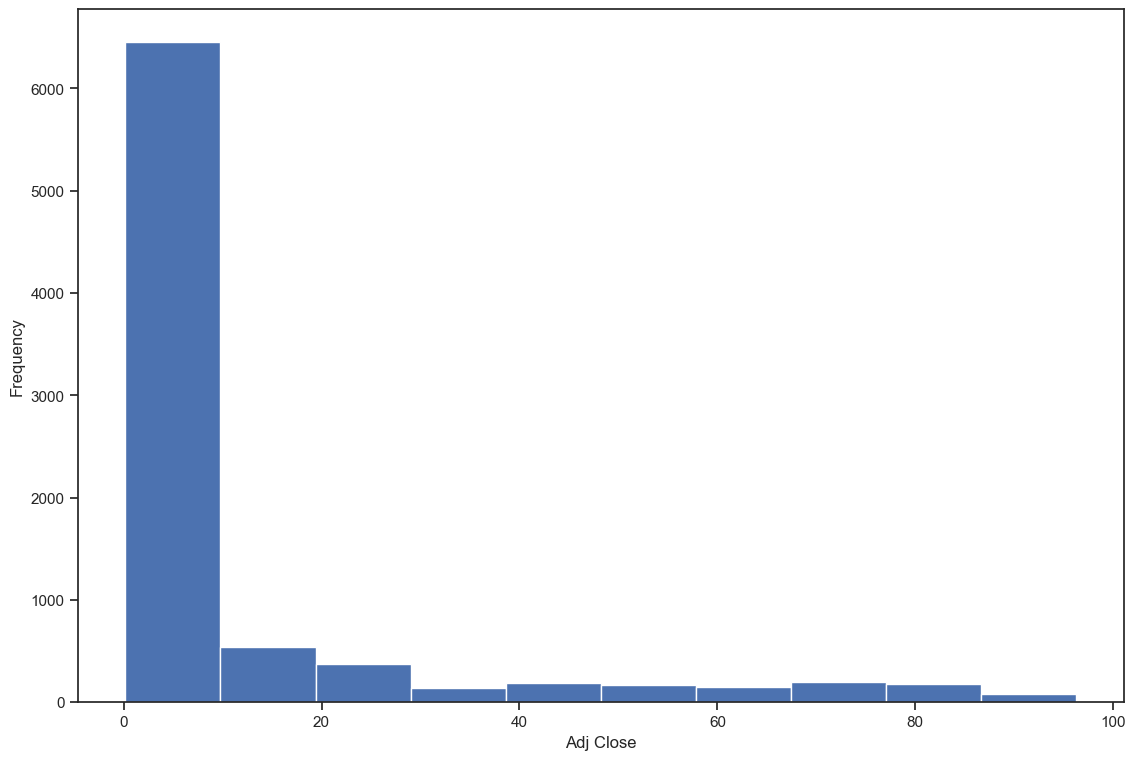

In [227]:
# using matplotlib

plt.figure(figsize=(13.5,9))
plt.hist(apple['Adj Close'])
plt.xlabel('Adj Close')
plt.ylabel('Frequency')
plt.show()

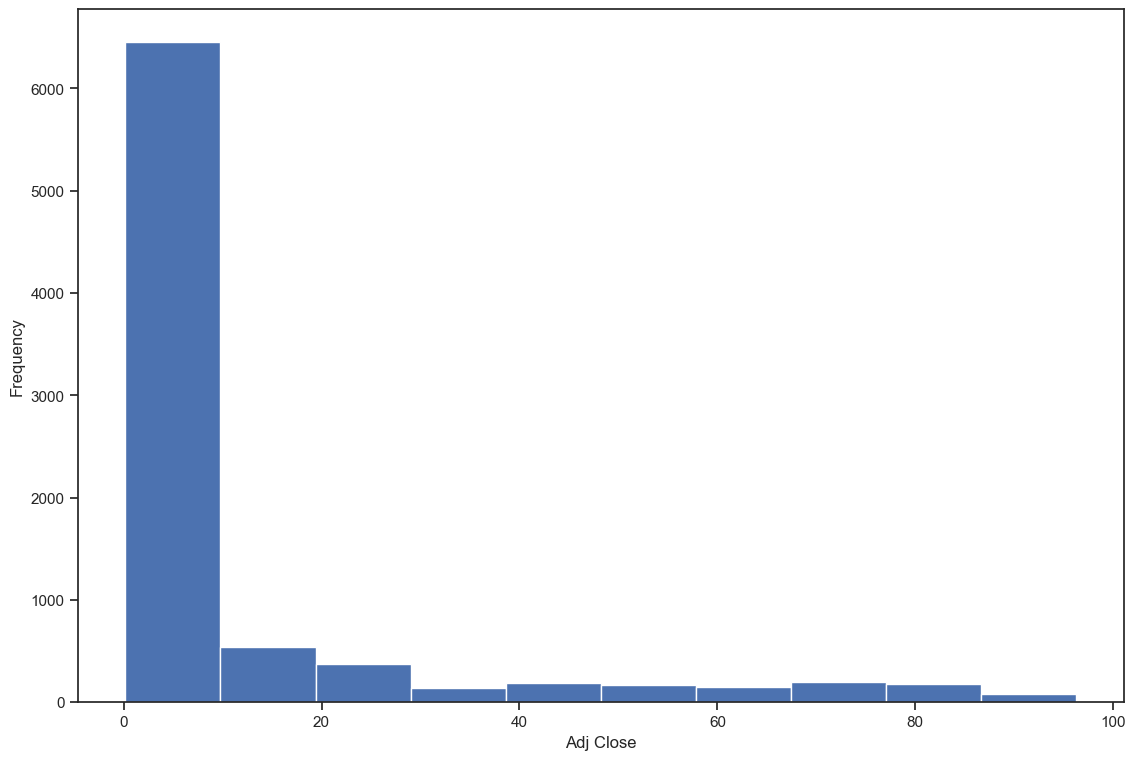

In [228]:
# using pandas dataframe

apple['Adj Close'].plot(kind = 'hist', figsize = (13.5 , 9))
plt.xlabel('Adj Close')
plt.show()

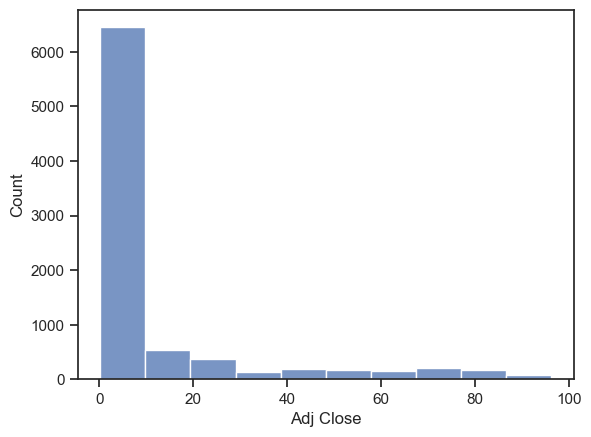

<Figure size 1350x900 with 0 Axes>

In [229]:
# using seaborn

sns.histplot(apple['Adj Close'], bins=10)
plt.figure(figsize=(13.5,9))
plt.show()

## The below exercises (77-80) required to use Online_Retail.csv file

### 77. Import the dataset from this Online_Retail.csv and assign it to a variable called online_rt

In [426]:
file_path = 'C://Projects//Manipulation_data//Exercise Data Files//Online_Retail.csv'
online_rt = pd.read_csv(file_path, encoding='latin-1')

In [427]:
online_rt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


### 78. Create a barchart with the 10 countries that have the most 'Quantity' ordered except UK

In [432]:
Top_10_Country = online_rt.groupby(['Country'])[['Quantity']].sum().sort_values(by = ['Quantity'], ascending=False)[1:11]
Top_10_Country

,Quantity
Country,
Netherlands,200128
EIRE,142637
Germany,117448
France,110480
Australia,83653
Sweden,35637
Switzerland,30325
Spain,26824
Japan,25218


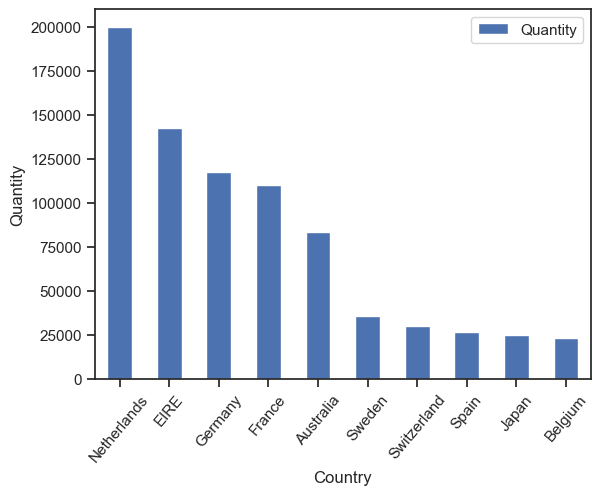

In [433]:
# using pandas

Top_10_Country.plot(kind='bar', rot = 50)
plt.ylabel('Quantity')
plt.show()


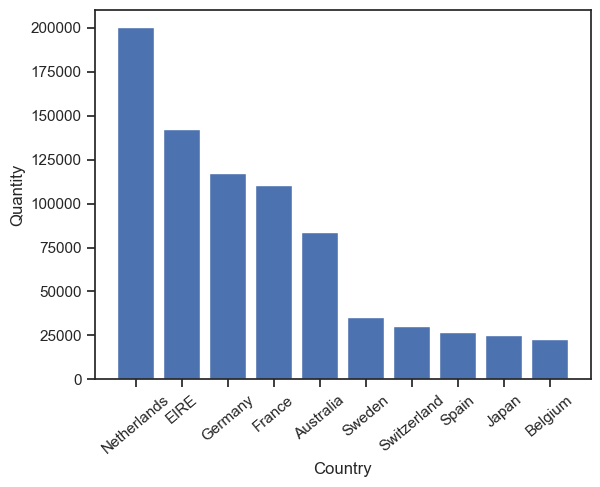

In [434]:
# using matplotlib

plt.bar(x = Top_10_Country.index , height= Top_10_Country.Quantity)
plt.xticks(rotation = 40)
plt.ylabel('Quantity')
plt.xlabel('Country')
plt.show()

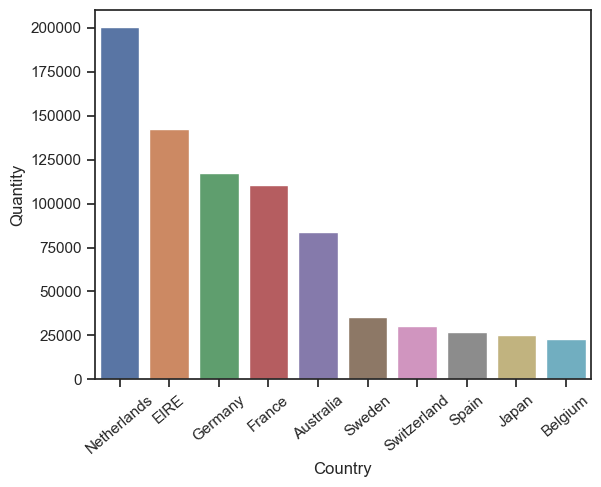

In [435]:
# using sns

sns.barplot(x = Top_10_Country.index , y = Top_10_Country.Quantity)
plt.xticks(rotation = 40)
plt.show()

### 79.  Exclude negative Quantity entries

In [436]:
# online_rt=online_rt.query('Quantity>0')  - assigning it to df

online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [437]:
negative_quan = online_rt[online_rt.Quantity<0]
negative_quan

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


In [438]:
negative_quan.index

Int64Index([   141,    154,    235,    236,    237,    238,    239,    240,
               241,    939,
            ...
            540141, 540142, 540176, 540422, 540448, 540449, 541541, 541715,
            541716, 541717],
           dtype='int64', length=10624)

In [439]:
online_rt.drop(negative_quan.index, inplace=True)

In [440]:
online_rt.CustomerID.value_counts()

17841.0    7847
14911.0    5677
14096.0    5111
12748.0    4596
14606.0    2700
           ... 
15313.0       1
17846.0       1
13185.0       1
16953.0       1
16737.0       1
Name: CustomerID, Length: 4339, dtype: int64

In [441]:
online_rt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


### 80. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries
Hint: First we need to find top-3 countries based on revenue, then create scater plot between Quantity and Unitprice for each country separately


In [442]:
cust = online_rt.groupby(by=['CustomerID','Country']).sum()
cust

C:\Users\91896\AppData\Local\Temp\ipykernel_4056\2189121579.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cust = online_rt.groupby(by=['CustomerID','Country']).sum()


,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,74215,1.04
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30
...,...,...,...
18280.0,United Kingdom,45,47.65
18281.0,United Kingdom,54,39.36
18282.0,United Kingdom,103,62.39


In [443]:
# there is a UnitPrice with negative price
cust = cust[cust.UnitPrice > 0]
cust.head(3)

,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,74215,1.04
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71


In [444]:
# get the value of the index and put in a new column Country
cust['Country'] = cust.index.get_level_values(1)

C:\Users\91896\AppData\Local\Temp\ipykernel_4056\1689922243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust['Country'] = cust.index.get_level_values(1)


In [445]:
#cust

In [446]:
# getting top 3 country on basis of revenue
online_rt['Revenue'] = online_rt['Quantity']*online_rt['UnitPrice']
Top_3_country_by_revenue = online_rt.groupby(by=['Country'])[['Revenue']].sum().sort_values(by= 'Revenue', ascending=False)[1:4]#.index.to_list()
Top_3_country_by_revenue

,Revenue
Country,
Netherlands,285446.34
EIRE,283453.96
Germany,228867.14


In [447]:
# Top 3 countries in terms of revenue, and converting the index to list
Top_3_countries = Top_3_country_by_revenue.index.to_list()
Top_3_countries

['Netherlands', 'EIRE', 'Germany']

In [448]:
# filter the dataframe for selecting top 3 countries
cust = cust[cust["Country"].isin(Top_3_countries)]
cust.head(3)

,,Quantity,UnitPrice,Country
CustomerID,Country,,,
12426.0,Germany,258,118.09,Germany
12427.0,Germany,533,142.26,Germany
12468.0,Germany,366,133.57,Germany


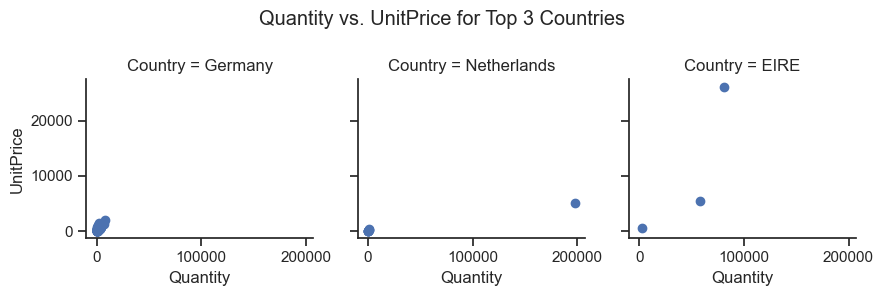

In [449]:
# plotting of the graph

g = sns.FacetGrid(cust,col='Country')
g.map(plt.scatter,'Quantity','UnitPrice')
g.fig.suptitle("Quantity vs. UnitPrice for Top 3 Countries")
plt.tight_layout()
plt.show()

## The below exercises (81-90) required to use FMCG_Company_Data_2019.csv file

### 81. Import the dataset FMCG_Company_Data_2019.csv and assign it to a variable called company_data

In [252]:
file_path = 'C://Projects//Manipulation_data//Exercise Data Files//FMCG_Company_Data_2019.csv'
company_data = pd.read_csv(file_path)
company_data

,Month,FaceCream,FaceWash,ToothPaste,Soap,Shampo,Moisturizer,Total_Units,Total_Revenue,Total_Profit
0,Jan-19,2500,1500,5200,9200,1200,1500,21100,3584890,211000
1,Feb-19,2630,1200,5100,6100,2100,1200,18330,2864979,183300
2,Mar-19,2140,1340,4550,9550,3550,1340,22470,4058082,224700
3,Apr-19,3400,1130,5870,8870,1870,1130,22270,2890646,222700
4,May-19,3600,1740,4560,7760,1560,1740,20960,2997280,209600
5,Jun-19,2760,1555,4890,7490,1890,1555,20140,2857866,201400
6,Jul-19,2980,1120,4780,8980,1780,1120,29550,5735655,295500
7,Aug-19,3700,1400,5860,9960,2860,1400,36140,5196932,361400
8,Sep-19,3540,1780,6100,8100,2100,1780,23400,3060720,234000
9,Oct-19,1990,1890,8300,10300,2300,1890,26670,4661916,266700


### 82. Create line chart for Total Revenue of all months with following properties
- X label name = Month
- Y label name = Total Revenue

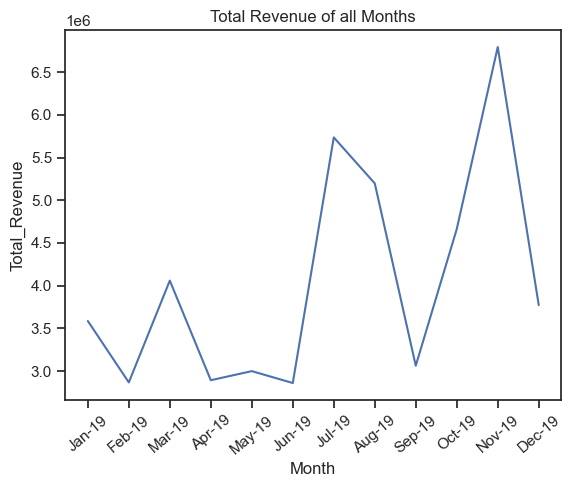

In [253]:
# using sns

sns.lineplot(x = company_data.Month, y = company_data.Total_Revenue)
plt.xticks(rotation = 40)
plt.title('Total Revenue of all Months')
plt.show()

### 83. Create line chart for Total Units of all months with following properties
- X label name = Month
- Y label name = Total Units
- Line Style dotted and Line-color should be red
- Show legend at the lower right location.

In [254]:
company_data.head()

,Month,FaceCream,FaceWash,ToothPaste,Soap,Shampo,Moisturizer,Total_Units,Total_Revenue,Total_Profit
0,Jan-19,2500,1500,5200,9200,1200,1500,21100,3584890,211000
1,Feb-19,2630,1200,5100,6100,2100,1200,18330,2864979,183300
2,Mar-19,2140,1340,4550,9550,3550,1340,22470,4058082,224700
3,Apr-19,3400,1130,5870,8870,1870,1130,22270,2890646,222700
4,May-19,3600,1740,4560,7760,1560,1740,20960,2997280,209600


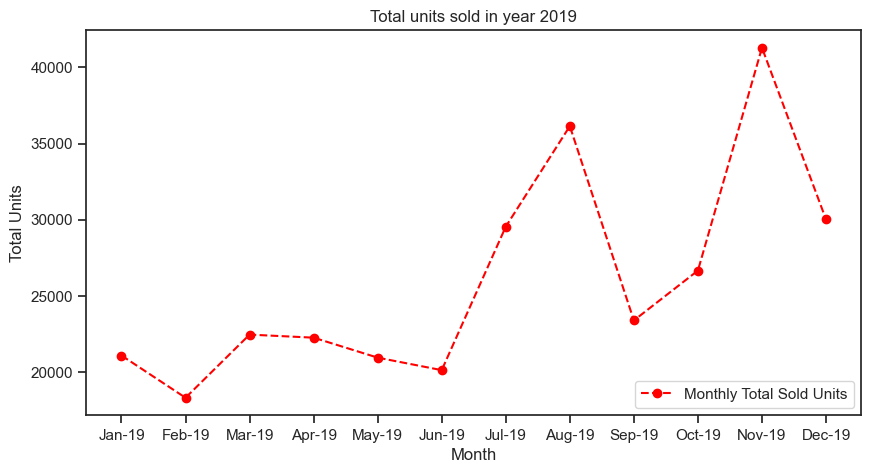

In [255]:
plt.figure(figsize=(10,5))
plt.plot(company_data['Month'],company_data['Total_Units'],linestyle='--', color='red', marker='o',label='Monthly Total Sold Units')
plt.legend(loc='lower right')
plt.title('Total units sold in year 2019')
plt.xlabel('Month')
plt.ylabel('Total Units')
plt.show()


### 84. Read all product sales data (Facecream, FaceWash, Toothpaste, Soap, Shampo, Moisturizer) and show it  using a multiline plot
- Display the number of units sold per month for each product using multiline plots. (i.e., Separate Plotline for each product ).

In [256]:
company_data.head(3)

,Month,FaceCream,FaceWash,ToothPaste,Soap,Shampo,Moisturizer,Total_Units,Total_Revenue,Total_Profit
0,Jan-19,2500,1500,5200,9200,1200,1500,21100,3584890,211000
1,Feb-19,2630,1200,5100,6100,2100,1200,18330,2864979,183300
2,Mar-19,2140,1340,4550,9550,3550,1340,22470,4058082,224700


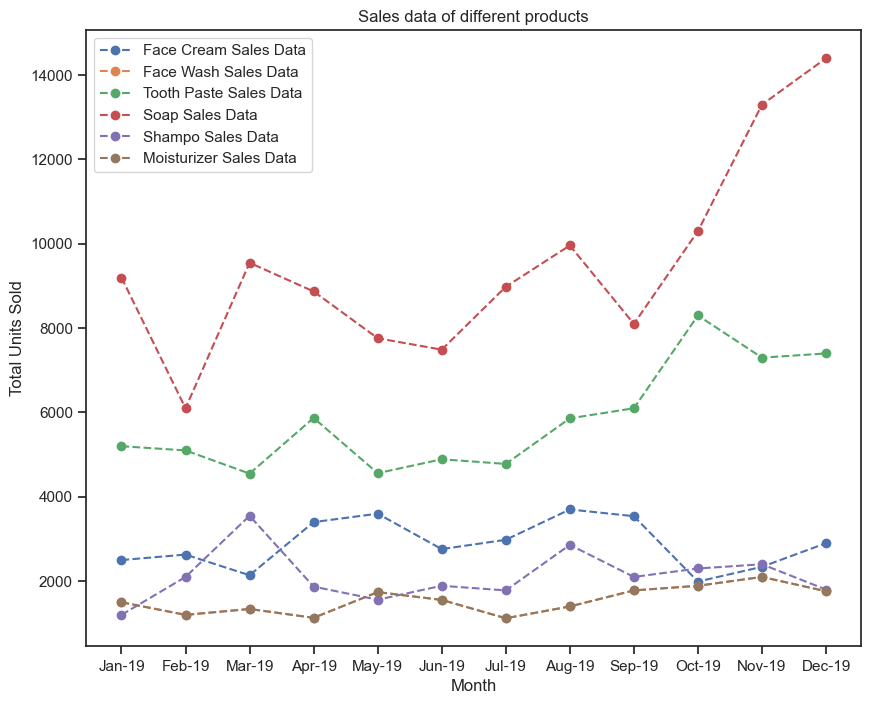

In [258]:
plt.figure(figsize=(10,8))

plt.plot(company_data['Month'],company_data['FaceCream'],linestyle='--',label="Face Cream Sales Data", marker='o')
plt.plot(company_data['Month'],company_data['FaceWash'],linestyle='--',label="Face Wash Sales Data", marker='o')
plt.plot(company_data['Month'],company_data['ToothPaste'],linestyle='--',label="Tooth Paste Sales Data", marker='o')
plt.plot(company_data['Month'],company_data['Soap'],linestyle='--',label="Soap Sales Data", marker='o')
plt.plot(company_data['Month'],company_data['Shampo'],linestyle='--',label="Shampo Sales Data", marker='o')
plt.plot(company_data['Month'],company_data['Moisturizer'],linestyle='--',label="Moisturizer Sales Data", marker='o')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.title('Sales data of different products')
plt.legend(loc=2)
plt.show()

### 85. Create Bar Chart for soap of all months and Save the chart in folder

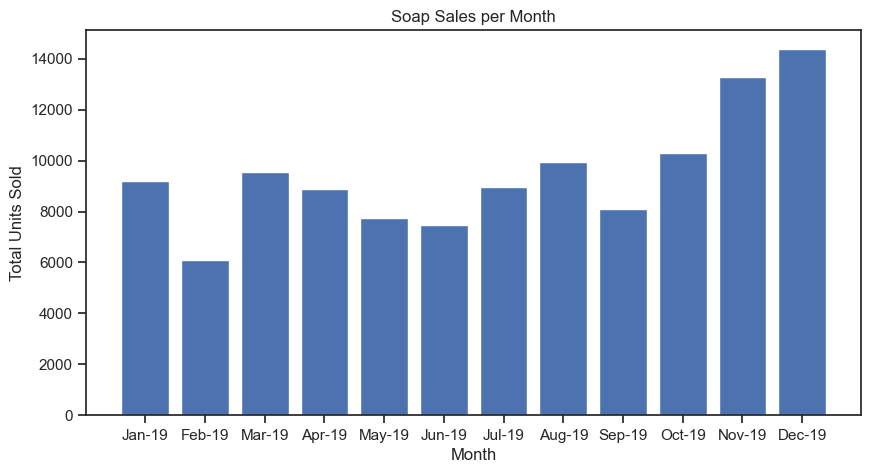

In [259]:
plt.figure(figsize=(10,5))
plt.bar(x=company_data['Month'],height=company_data['Soap'],label="Soap Sales Data")
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.title('Soap Sales per Month')
plt.savefig('D://Projects//eda//visualisation//soap_sales_chart.png',bbox_inches='tight',dpi=150)
plt.show()

### 86. Create Stacked Bar Chart for Soap, Shampo, ToothPaste for each month
The bar chart should display the number of units sold per month for each product. Add a separate bar for each product in the same chart.

In [260]:
company_data.head(3)

,Month,FaceCream,FaceWash,ToothPaste,Soap,Shampo,Moisturizer,Total_Units,Total_Revenue,Total_Profit
0,Jan-19,2500,1500,5200,9200,1200,1500,21100,3584890,211000
1,Feb-19,2630,1200,5100,6100,2100,1200,18330,2864979,183300
2,Mar-19,2140,1340,4550,9550,3550,1340,22470,4058082,224700


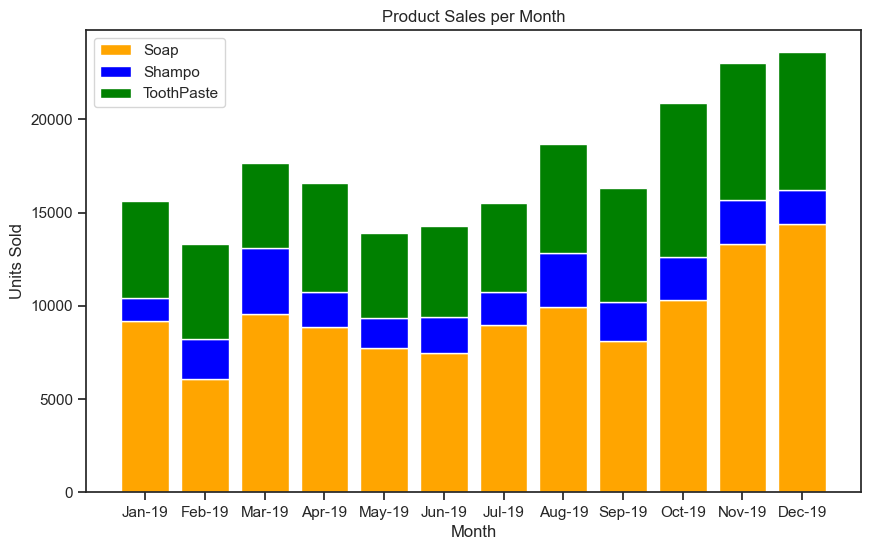

In [271]:
plt.figure(figsize=(10,6))    # Adjust figure size if needed

# Calculate the bottom positions for each bar to stack them
bottom_shampo= np.add(company_data.Soap,company_data.Shampo)   


# Plot stacked bars for each product
plt.bar(company_data['Month'],company_data['Soap'],label='Soap',color='orange')
plt.bar(company_data['Month'],company_data['Shampo'],label='Shampo',color='blue',bottom=company_data.Soap)
plt.bar(company_data['Month'],company_data['ToothPaste'],label='ToothPaste',color='green',bottom=bottom_shampo)


# Add labels for X and Y axis
plt.xlabel('Month')
plt.ylabel('Units Sold')

# Set a title for the chart
plt.title('Product Sales per Month')

# Add a legend to differentiate product bars
plt.legend()

# Display the stacked bar chart
plt.show()

### 87. Create Histogram for Total Revenue

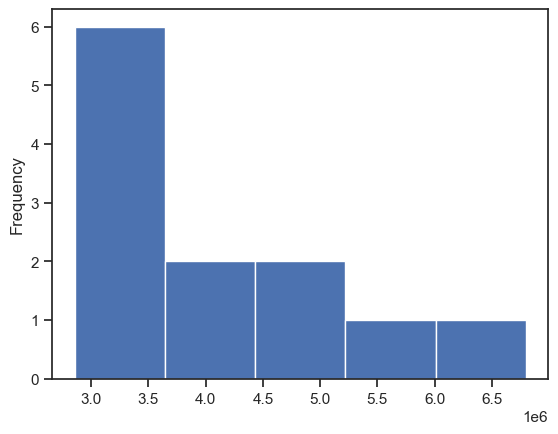

In [272]:
# using pandas
company_data['Total_Revenue'].plot(kind = 'hist', bins = 5)
plt.show()

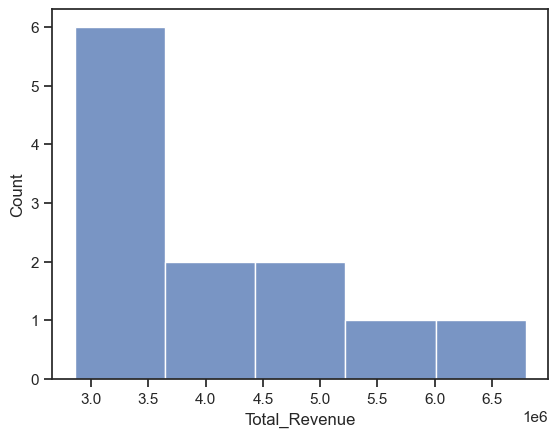

In [273]:
# using seaborn
sns.histplot(company_data['Total_Revenue'])
plt.show()

### 88. Calculate total sales data (quantity) for 2019 for each product and show it using a Pie chart. Understand percentage contribution from each product

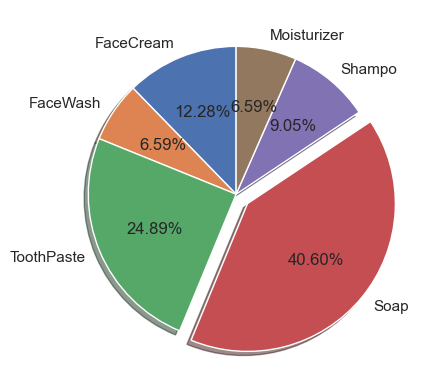

In [266]:
# using pandas
Tot_Sales = company_data.loc[:,['FaceCream', 'FaceWash','ToothPaste', 'Soap', 'Shampo', 'Moisturizer' ]].sum()
Tot_Sales.plot(kind='pie', autopct= '%1.2f%%',shadow= True, explode=[0.0,0.0,0.0,0.1,0.0,0.0],startangle=90)
plt.show()


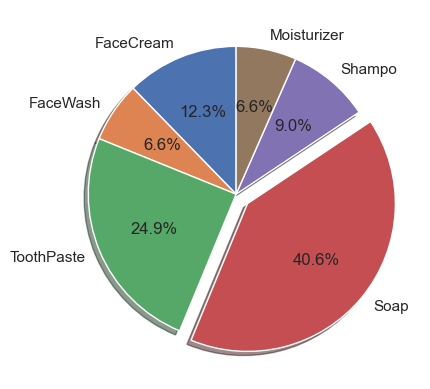

In [267]:
# using matplotlib
plt.pie(Tot_Sales, labels= Tot_Sales.index, autopct='%1.1f%%',shadow= True, explode=[0.0,0.0,0.0,0.1,0.0,0.0],startangle=90)
plt.show()

### 89. Create line plots for Soap & Facewash of all months in a single plot using Subplot

In [274]:
company_data.head(3)

,Month,FaceCream,FaceWash,ToothPaste,Soap,Shampo,Moisturizer,Total_Units,Total_Revenue,Total_Profit
0,Jan-19,2500,1500,5200,9200,1200,1500,21100,3584890,211000
1,Feb-19,2630,1200,5100,6100,2100,1200,18330,2864979,183300
2,Mar-19,2140,1340,4550,9550,3550,1340,22470,4058082,224700


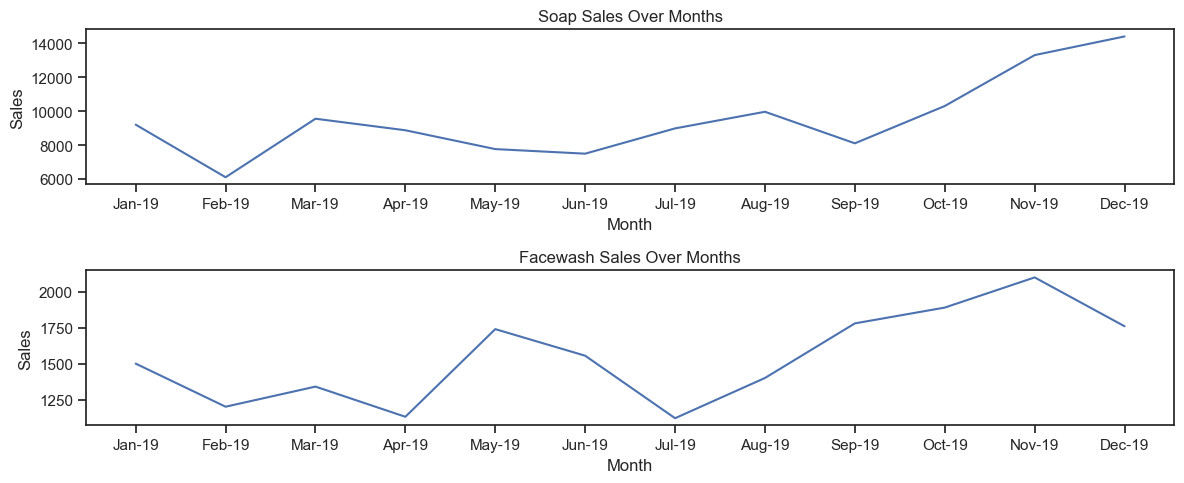

In [300]:
# create a subplots with 1 rows and 2 columns
fig, axs = plt.subplots(2,1, figsize = (12,5))  

# plot sales for Soap
axs[0].plot(company_data.Month, company_data.Soap)
axs[0].set_title("Soap Sales Over Months")
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Sales')

# plot sales for FaceWash
axs[1].plot(company_data.Month, company_data.FaceWash)
axs[1].set_title("Facewash Sales Over Months")
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Sales')

#Adjusting space between plots
plt.tight_layout()

#Display the plots
plt.show()


### 90. Create Box Plot for Total Profit variable

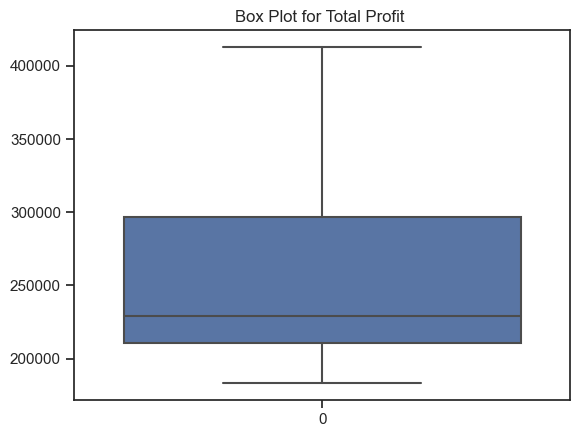

In [268]:
sns.boxplot(company_data.Total_Profit)
plt.title('Box Plot for Total Profit ')
plt.show()